In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 8
import sklearn

In [3]:
data = pd.read_csv('AirPassengers.csv')  # file is in the same folder as of ipynb file
print('\n Data Top rows:')
print(data.head())
print('\n Data Bottom rows:')
print(data.tail())
print('\n Data Types:')
print(data.dtypes)


 Data Top rows:
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Bottom rows:
       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [4]:
data['Month']=pd.to_datetime(data['Month'])

In [5]:
data.set_index('Month', inplace=True)

In [6]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

#### Converting data frame into time series

In [8]:
ts=data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [9]:
from datetime import datetime
print('by datetime function:',ts[datetime(1960,1,1)])
print('\nby ts call:', ts['1960-01-01'])  #1960-1-1 is equivalent to 1960-01-01

by datetime function: 417

by ts call: 417


In [10]:
# by range

ts['1960-01-01':'1960-05-01']   # yyyy-mm-dd format

Month
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
Name: #Passengers, dtype: int64

In [11]:
# by range

ts['1959-06-01':]   # yyyy-mm-dd format

Month
1959-06-01    472
1959-07-01    548
1959-08-01    559
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

In [12]:
# all roes of 1950

# by range

ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

C:\Users\mishr\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


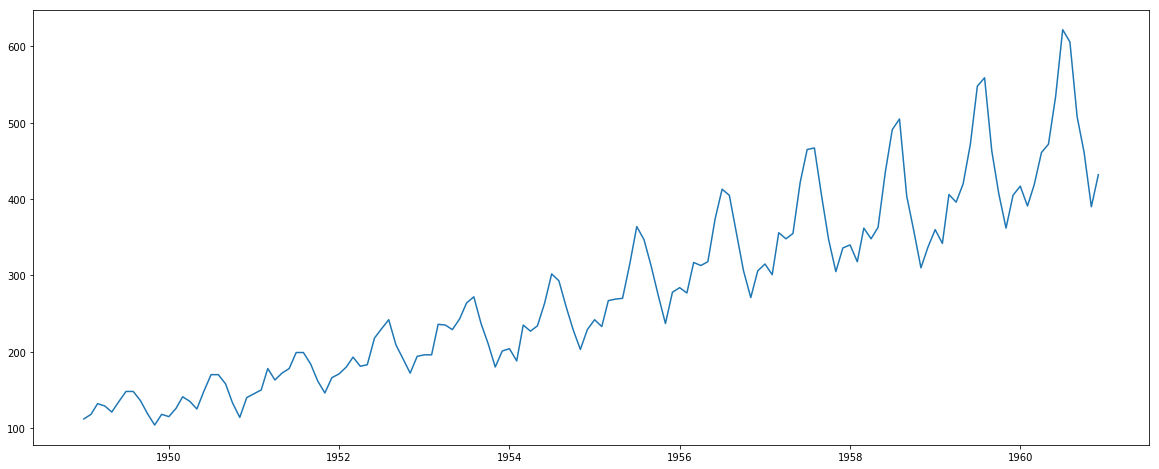

In [13]:
plt.plot(ts)

there is an overall increase in the trend,with some seasonality in it

#### Dickey-fuller Test 
This is one of the statistical tests for checking stationarity. 
                ``null hypothesis: the time series is non- stationary``

In [14]:
from statsmodels.tsa.stattools import adfuller


def plot_mean_std(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

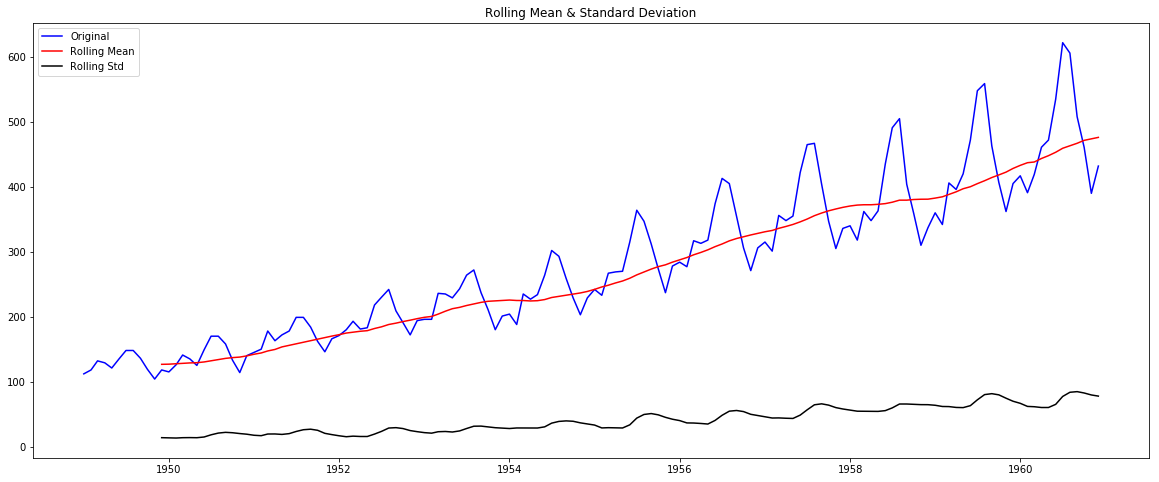

In [15]:
plot_mean_std(ts)

In [16]:
 #Perform Dickey-Fuller test:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    print("")
    #print(dftest)
    print("\n Printing result in tabular format:\n")
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [17]:
test_stationarity(ts)

Results of Dickey-Fuller Test:


 Printing result in tabular format:

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


#### because of strong confidence interval of 99.10% we fail to reject the null hypothesis and with 99.10 confidence we conclude that the timeseries is non stationary 

### MAKING THE TIME SERIES STATIONARY

There are two major factors that make a time series non-stationary. They are:

• Trend: non-constant mean

• Seasonality: Variation at specific time-frames

#### Handling Trend

we can do timeseries transformation like log, sq root, cube root etc depending upon the pattern of our time series data

in our case the trend is upward and increaing over a period of time, so in this case we will use a lograthmic scale transfromation

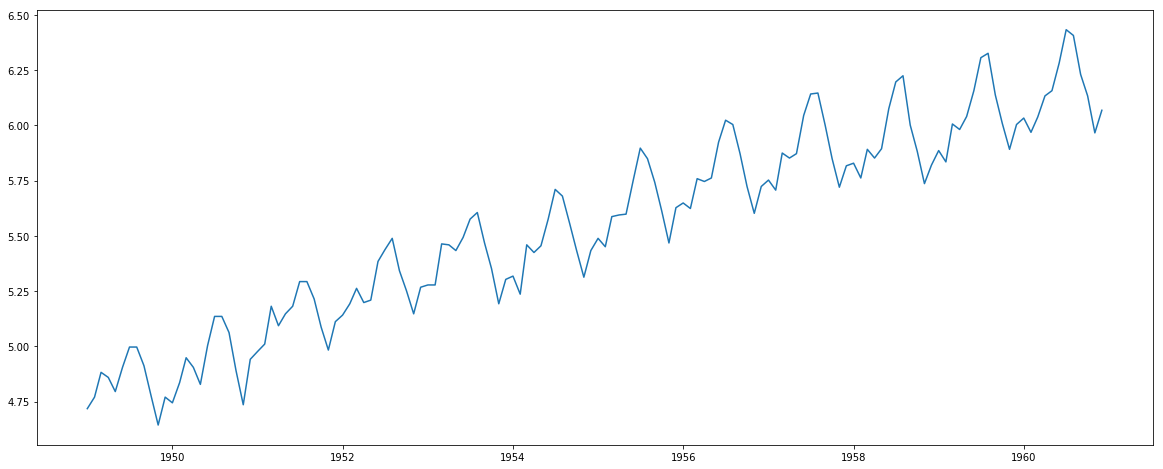

In [18]:
ts_log= np.log(ts)
plt.plot(ts_log)

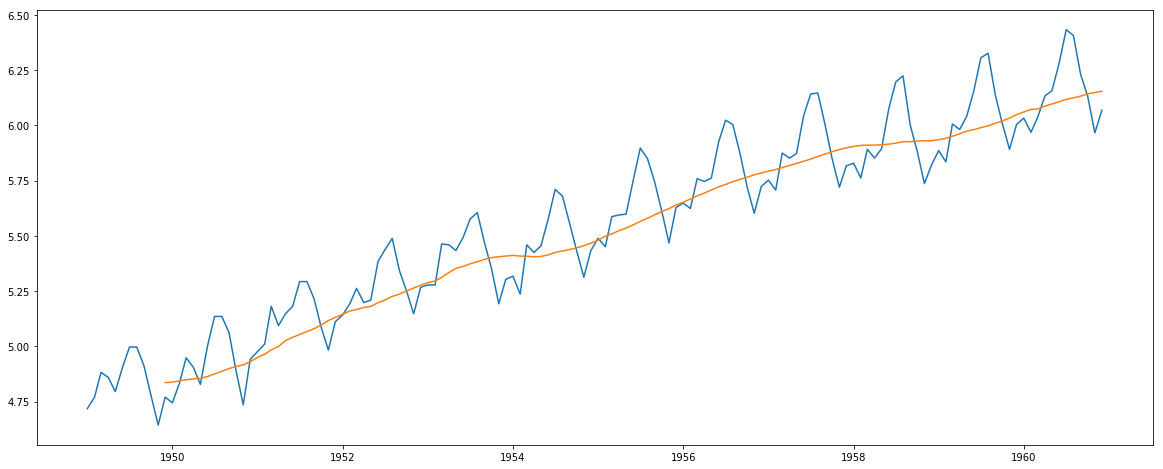

In [19]:
#Calculate the rolling mean as our series is still not stationary in terms of trend

ts_rolmean = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(ts_rolmean)

In [20]:
#substracting rolling mean from the log series 
#(which most probably will help in this scenario as the rolling mean is increasing at the same rate as of the trend)t


ts_log_mean_diff = ts_log-ts_rolmean
print(ts_log_mean_diff.head(20))
# 11 values will be null as we take The reason there are null values is because we take the average 
#of first 12 so 11 values are null.

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
Name: #Passengers, dtype: float64


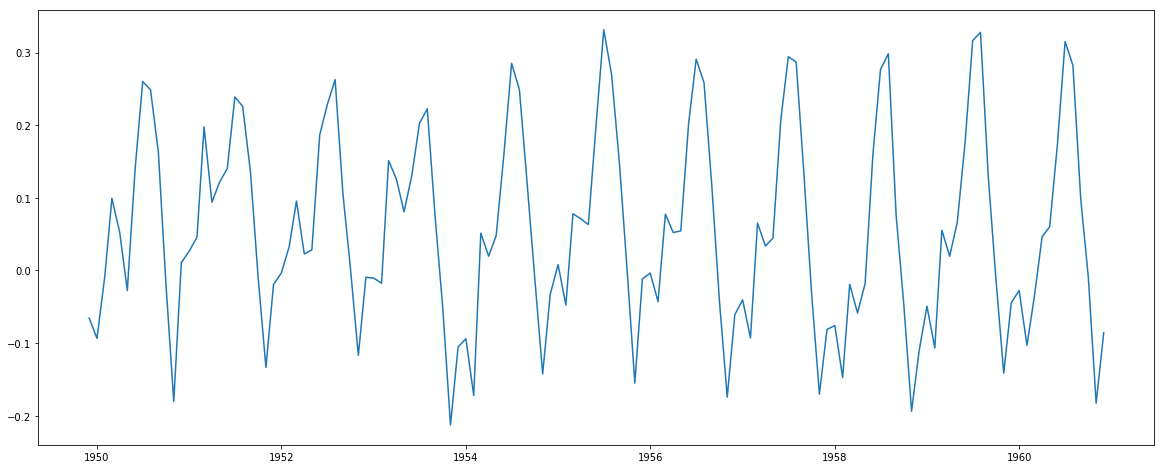

In [21]:

plt.plot(ts_log_mean_diff)

# graph will be visible from 12th month of 1949 onwards
ts_log_mean_diff.dropna(inplace=True)

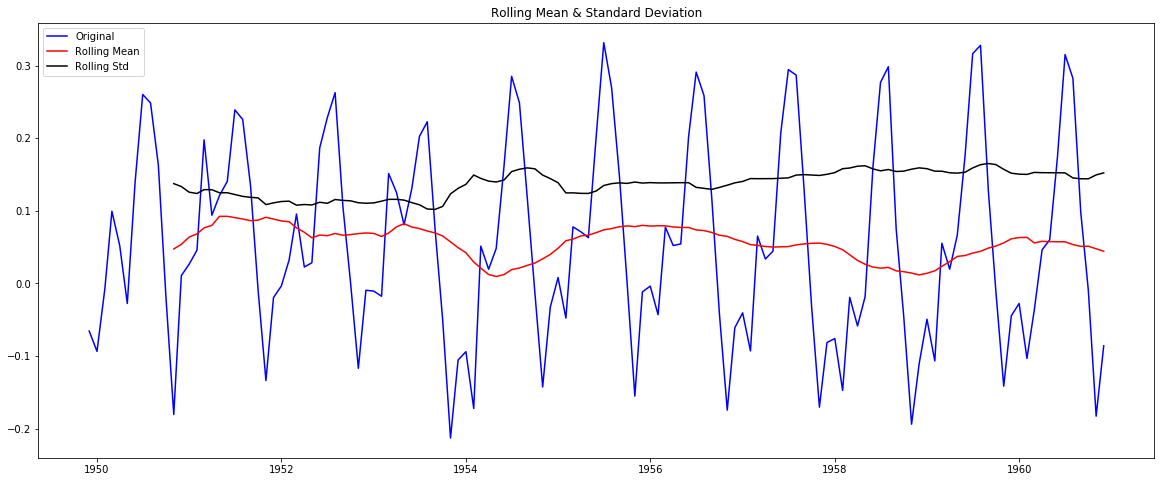

Results of Dickey-Fuller Test:


 Printing result in tabular format:

Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64
None


In [22]:
# putting the resultant series into graph and dicky fuller tests again
plot_mean_std(ts_log_mean_diff)
print(test_stationarity(ts_log_mean_diff))

#### since the p value is lower tha 0.05 we can reject null hypothesis of timeseries being non stationary with 95 % conficence

### Exponential decay method

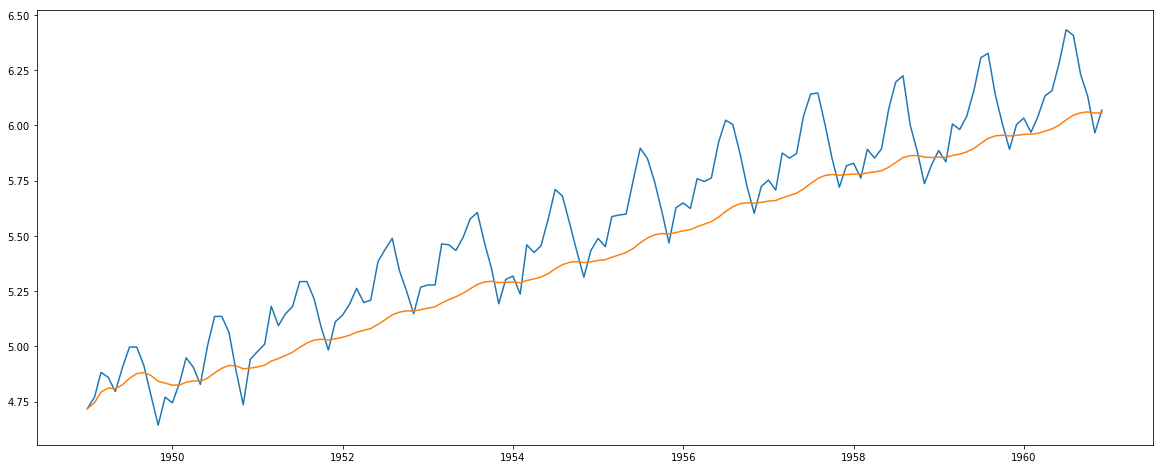

In [23]:
ts_exp_wt=pd.Series.ewm(ts_log,halflife=12).mean()
plt.plot(ts_log)
plt.plot(ts_exp_wt)

In [24]:
#substracting exponential mean from the log series 
#(which most probably will help in this scenario as the rolling mean is increasing at the same rate as of the trend)t


ts_exp_wt_diff = ts_log-ts_exp_wt
print(ts_exp_wt_diff.head(20))
# 11 values will be null as we take The reason there are null values is because we take the average 
#of first 12 so 11 values are null, since it is handling decay no values will be lost

Month
1949-01-01    0.000000
1949-02-01    0.025339
1949-03-01    0.088967
1949-04-01    0.048028
1949-05-01   -0.012415
1949-06-01    0.078468
1949-07-01    0.141648
1949-08-01    0.120164
1949-09-01    0.030677
1949-10-01   -0.089698
1949-11-01   -0.197645
1949-12-01   -0.063342
1950-01-01   -0.079625
1950-02-01    0.010538
1950-03-01    0.111103
1950-04-01    0.061326
1950-05-01   -0.014232
1950-06-01    0.147387
1950-07-01    0.255717
1950-08-01    0.234766
Name: #Passengers, dtype: float64


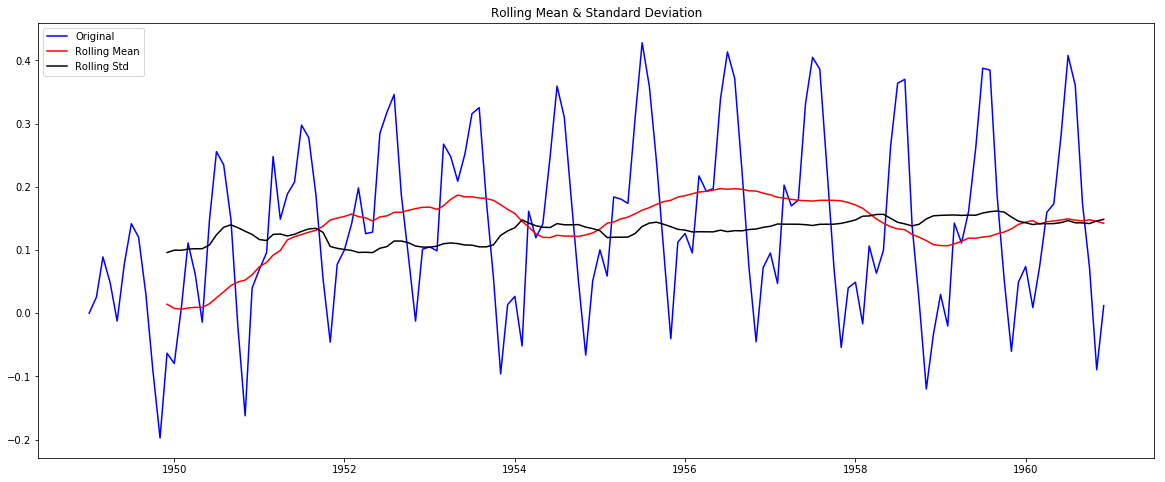

Results of Dickey-Fuller Test:


 Printing result in tabular format:

Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
None


In [25]:
# putting the resultant series into graph and dicky fuller tests again
plot_mean_std(ts_exp_wt_diff)
print(test_stationarity(ts_exp_wt_diff))

#### since the p value is lower tha 0.005 we can reject null hypothesis of timeseries being non stationary with 99 % conficence

### Seasonality along with Trend

There are two common methods to remove trend and seasonality, they are:

• Differencing: by taking difference using time lag

• Decomposition: model both trend and seasonality, then remove them

#### Differencing 
``handles seasonality``

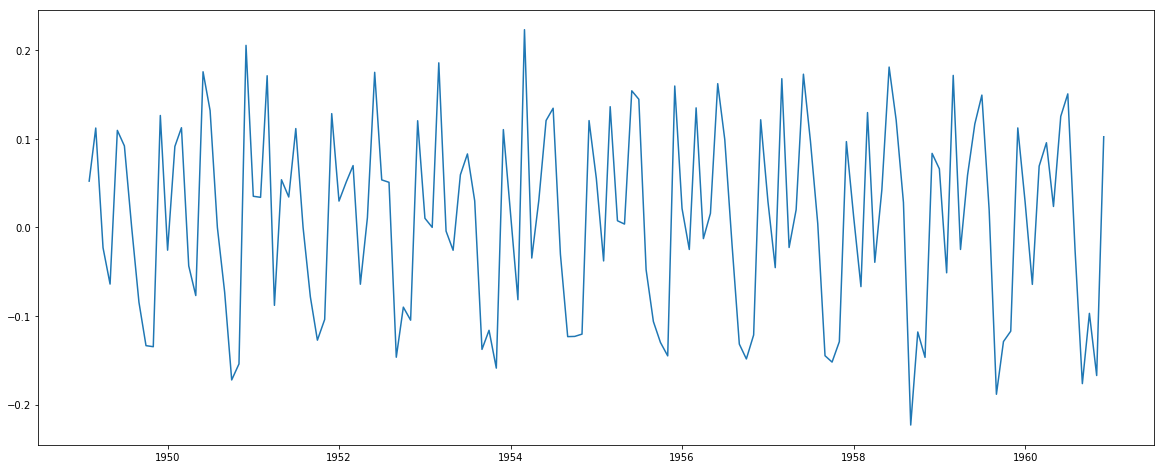

In [26]:

ts_log_diff = ts_log-ts_log.shift()
ts_log_diff.dropna(inplace=True)
plt.plot(ts_log_diff)

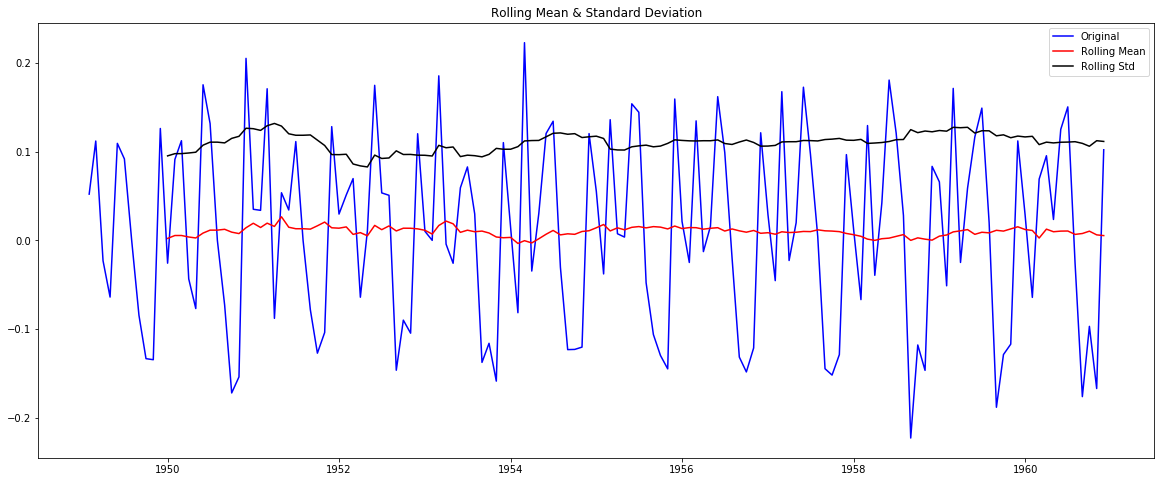

Results of Dickey-Fuller Test:


 Printing result in tabular format:

Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64
None


In [27]:
# putting the resultant series into graph and dicky fuller tests again
plot_mean_std(ts_log_diff)
print(test_stationarity(ts_log_diff))

#### test statistic is less than 10% of the critical values, so we can be 90 % confident that this is stationary.

#### Decomposition
``handles both trend seasonality``

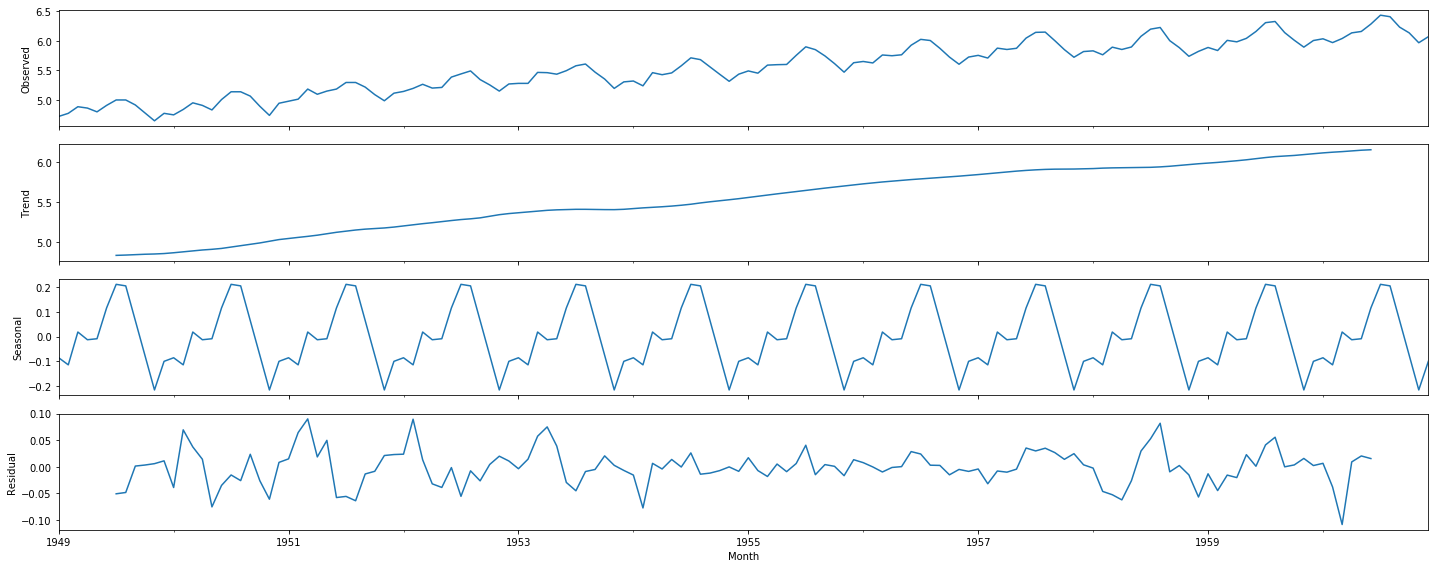

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(ts_log)
fig = decomposition.plot()
plt.show()

In [30]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual= decomposition.resid

In [33]:
type(residual)

pandas.core.series.Series

In [34]:
ts_log_decompose= residual
ts_log_decompose.isnull().sum()  #where there is no error (residual)

12

In [40]:
ts_log_decompose.dropna(inplace=True)

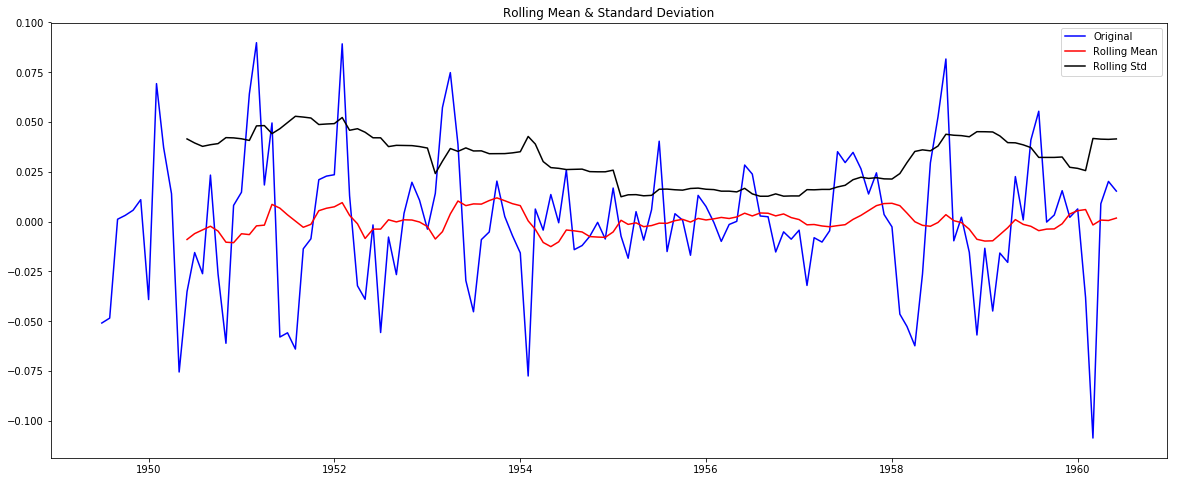

Results of Dickey-Fuller Test:


 Printing result in tabular format:

Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64
None


In [41]:
plot_mean_std(ts_log_decompose)
print(test_stationarity(ts_log_decompose))

#### This is stationary because:

• test statistic is lower than 1% critical values.

• the mean and std variations have small variations with time.

#### Auto Regressive Integrated Moving Average(ARIMA)

It is like a liner regression equation where the predictors depend on parameters (p,d,q) of the ARIMA model .

#### Dependent parameters are:

• p : This is the number of AR (Auto-Regressive) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).

• q : This is the number of MA (Moving-Average) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).

• d :This is the number of differences or the number of non-seasonal differences.



#### Figure out what value of p and q to use. We use two popular plotting techniques; they are:

• Autocorrelation Function (ACF): It just measures the correlation between two consecutive (lagged version). example at lag   4, ACF will compare series at time instance t1…t2 with series at instance t1–4…t2–4

• Partial Autocorrelation Function (PACF): is used to measure the degree of association between y(t) and y(t-p).

In [44]:
from statsmodels.tsa.arima_model import ARIMA

#ACF and PACF plots
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(ts_log_diff, nlags=20)    #ts_log_diff is time series after differencing
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

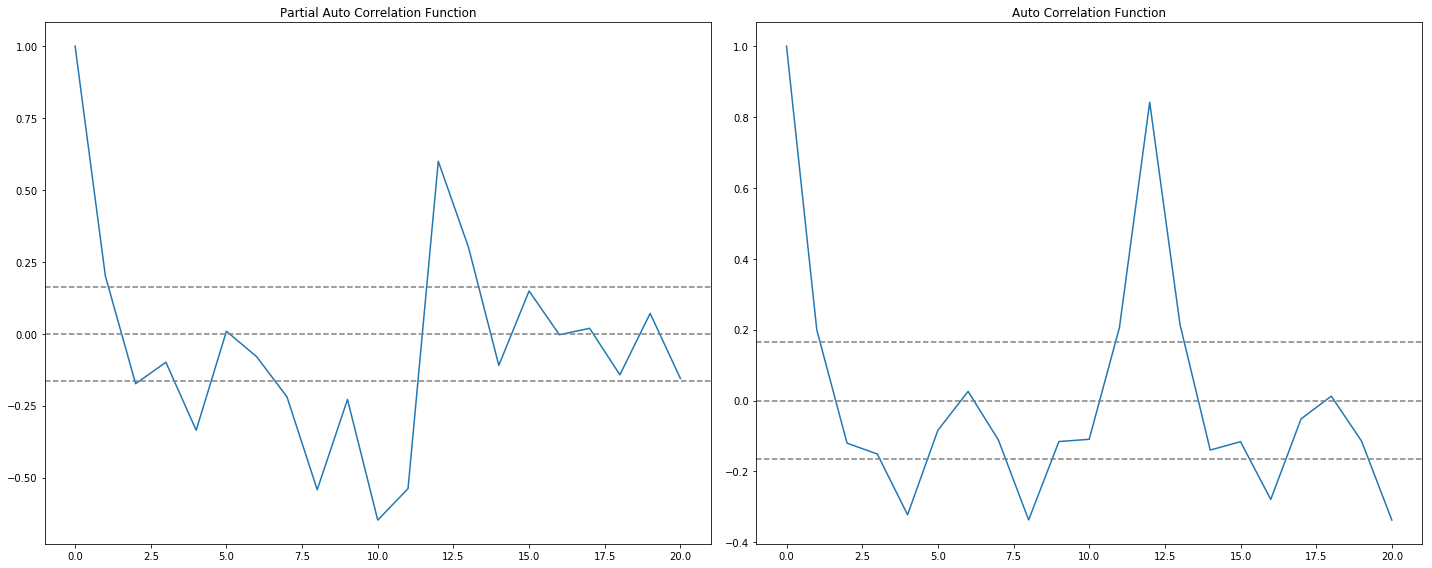

In [47]:
#plot ACF

plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y= 0,linestyle='--',color='grey')
plt.axhline(y= 1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.axhline(y= -1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.title("Auto Correlation Function")
plt.tight_layout()

#plot PACF

plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y= 0,linestyle='--',color='grey')
plt.axhline(y= 1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.axhline(y= -1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.title("Partial Auto Correlation Function")
plt.tight_layout()

• p: The first time where the PACF crosses the upper confidence interval, here its close to 2. hence p = 2.

• q: The first time where the ACF crosses the upper confidence interval, here its close to 2. hence q = 2.

#### Making 3 different ARIMA models considering individual as well as combined effects

`` 1. ARIMA with p value "AR"``

`` 2. ARIMA with q value "MA"``

`` 3. ARIMA with both p and q values "ARMA"``

#### AR

C:\Users\mishr\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mishr\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS 1.5023')

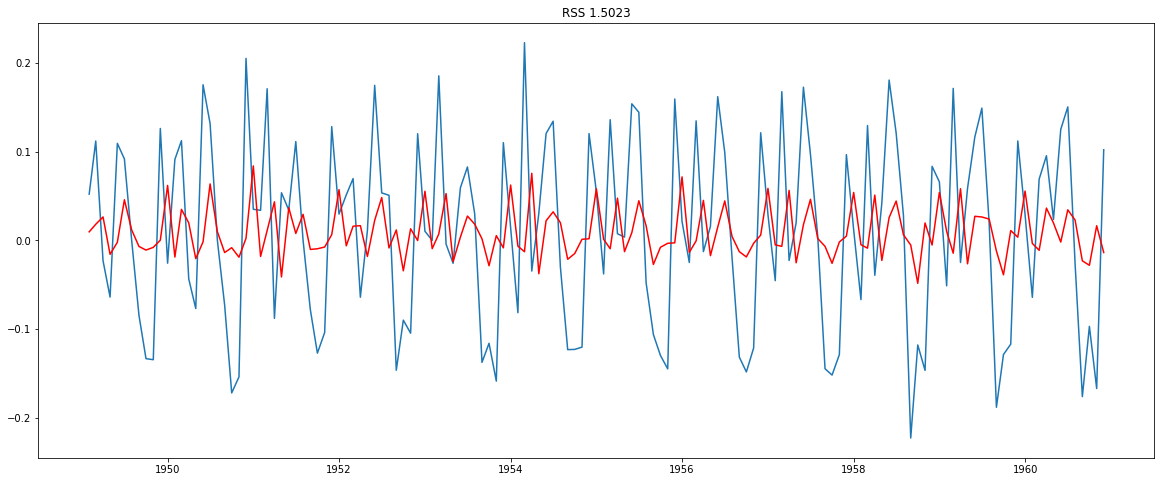

In [51]:
model = ARIMA(ts_log,order=(2,1,0))
results_ar=model.fit(disp=-1)

plt.plot(ts_log_diff)
plt.plot(results_ar.fittedvalues,color='red')
plt.title('RSS %.4f'% sum((results_ar.fittedvalues-ts_log_diff)**2))

#### MA

C:\Users\mishr\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mishr\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\mishr\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS 1.4721')

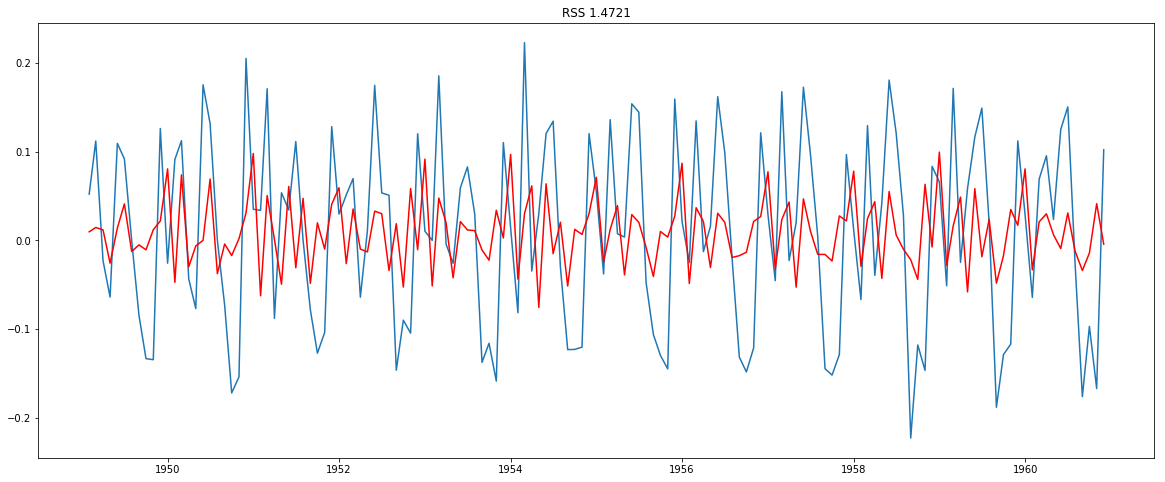

In [52]:
model = ARIMA(ts_log,order=(0,1,2))
results_ma=model.fit(disp=-1)

plt.plot(ts_log_diff)
plt.plot(results_ma.fittedvalues,color='red')
plt.title('RSS %.4f'% sum((results_ma.fittedvalues-ts_log_diff)**2))

#### ARMA model

C:\Users\mishr\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mishr\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS 1.0292')

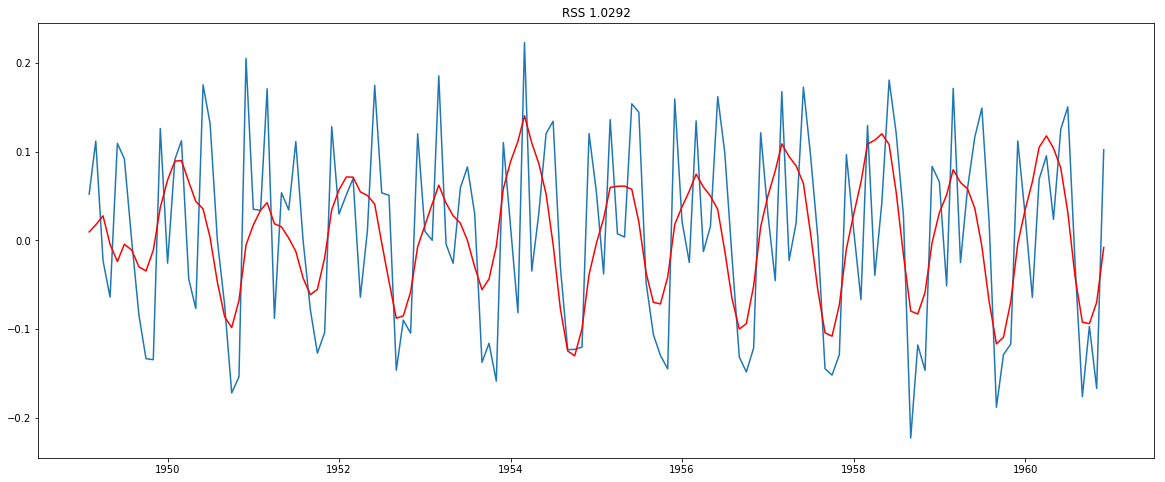

In [53]:
model = ARIMA(ts_log,order=(2,1,2))
results_arma=model.fit(disp=-1)

plt.plot(ts_log_diff)
plt.plot(results_arma.fittedvalues,color='red')
plt.title('RSS %.4f'% sum((results_arma.fittedvalues-ts_log_diff)**2))

#### RSS values:

``• AR=1.5023``

``• MA=1.472``

``• ARIMA =1.0292``

ARIMA has the best RSS values.

#### FINAL STEP: BRINGING THIS BACK TO THE ORIGINAL SCALE

Steps involved:

• First get the predicted values and store it as series. You will notice the first month is missing because we took a lag of 1(shift).

In [54]:
pred_arima = pd.Series(results_arma.fittedvalues,copy=True)
pred_arima.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


• Now convert differencing to log scale: 

find the cumulative sum and add it to a new series with a base value (here the first-month value of the log series).

In [55]:
pred_arima_cumsum = pred_arima.cumsum()
pred_arima_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [58]:
pred_arima_log= pd.Series(ts_log.iloc[0],index= ts_log.index)
pred_arima_log = pred_arima_log.add(pred_arima_cumsum,fill_value=0)
pred_arima_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

• Next -take the exponent of the series from above (anti-log) which will be the predicted value — the time series forecast model.

In [59]:
predictions_arima = np.exp(pred_arima_log)

#### Predicted value against the original value 

```` Calculating RMSE````

Text(0.5, 1.0, 'RSS 1081.2541')

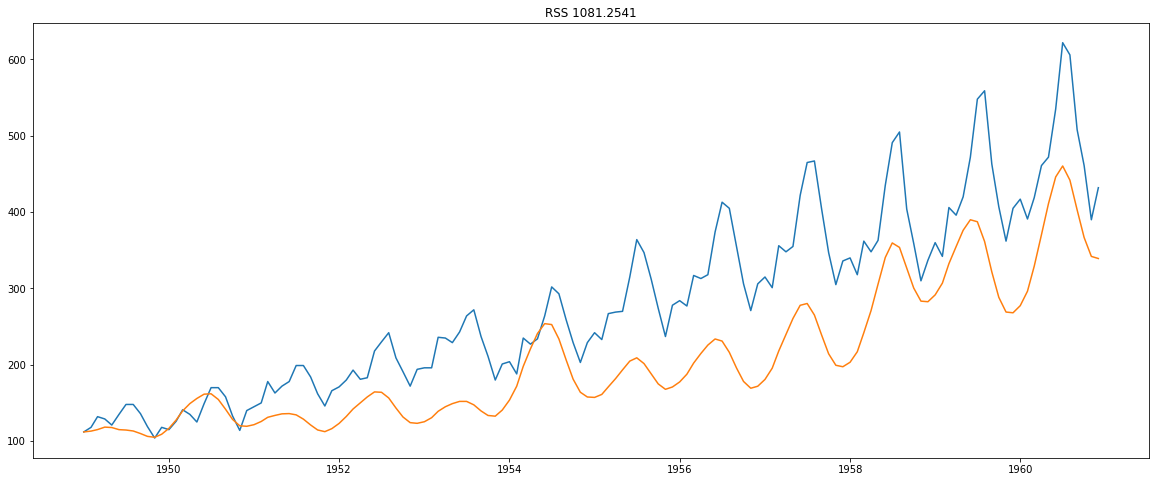

In [60]:
plt.plot(ts)
plt.plot(predictions_arima)
plt.title('RSS %.4f'% np.sqrt(sum((predictions_arima-ts)**2)))